In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns

In [ ]:
# Load tips dataset
tips = sns.load_dataset('tips')


In [ ]:
# Preprocessing
# Converting categorical variables to dummy variables
tips = pd.get_dummies(tips, drop_first=True)

# Selecting features and target (predicting 'tip' based on other features)
X = tips.drop('tip', axis=1)
y = tips['tip']


In [ ]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

# Standardizing the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
# Building the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu',
                          input_shape=(X_train.shape[1],)), # Input layer

    tf.keras.layers.Dense(32, activation='relu'), # Hidden layer

    tf.keras.layers.Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Training the model
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

# Evaluating the model (using Mean Squared Error)
loss = model.evaluate(X_test, y_test, verbose=0)
print('Mean Squared Error: ', loss[0])

Epoch 1/100
7/7 [==============================] - 2s 6ms/step - loss: 13.1616 - mae: 3.3002
Epoch 2/100
7/7 [==============================] - 0s 4ms/step - loss: 9.6441 - mae: 2.7499
Epoch 3/100
7/7 [==============================] - 0s 3ms/step - loss: 7.0564 - mae: 2.2465
Epoch 4/100
7/7 [==============================] - 0s 4ms/step - loss: 5.0550 - mae: 1.8026
Epoch 5/100
7/7 [==============================] - 0s 3ms/step - loss: 3.6082 - mae: 1.4204
Epoch 6/100
7/7 [==============================] - 0s 2ms/step - loss: 2.5927 - mae: 1.1455
Epoch 7/100
7/7 [==============================] - 0s 3ms/step - loss: 1.9629 - mae: 0.9987
Epoch 8/100
7/7 [==============================] - 0s 3ms/step - loss: 1.7056 - mae: 0.9591
Epoch 9/100
7/7 [==============================] - 0s 3ms/step - loss: 1.5839 - mae: 0.9494
Epoch 10/100
7/7 [==============================] - 0s 3ms/step - loss: 1.5026 - mae: 0.9386
Epoch 11/100
7/7 [==============================] - 0s 3ms/step - loss: 1.4117

In [ ]:
# Building the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)), # Input layer
    tf.keras.layers.Dense(32, activation='relu'), # Hidden layer
    tf.keras.layers.Dense(1)  # Output layer for regression
])

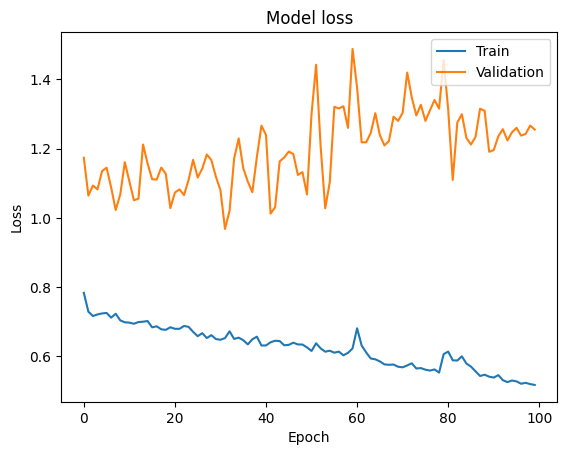

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# train the model and plot the training and testing loss and accuracy at each epoc
history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0, validation_data=(X_test, y_test))

# Evaluating the model (using Mean Squared Error)
loss = model.evaluate(X_test, y_test, verbose=0)
loss

# Plotting the training and testing loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

#For Early Stopping

Epoch 1/100
7/7 [==============================] - 3s 176ms/step - loss: 10.3546 - val_loss: 6.2423
Epoch 2/100
7/7 [==============================] - 0s 29ms/step - loss: 8.5108 - val_loss: 4.8945
Epoch 3/100
7/7 [==============================] - 0s 24ms/step - loss: 6.8990 - val_loss: 3.6706
Epoch 4/100
7/7 [==============================] - 0s 25ms/step - loss: 5.3971 - val_loss: 2.5234
Epoch 5/100
7/7 [==============================] - 0s 18ms/step - loss: 3.9117 - val_loss: 1.6209
Epoch 6/100
7/7 [==============================] - 0s 42ms/step - loss: 2.7042 - val_loss: 1.0787
Epoch 7/100
7/7 [==============================] - 0s 20ms/step - loss: 1.9301 - val_loss: 0.9454
Epoch 8/100
7/7 [==============================] - 0s 29ms/step - loss: 1.5179 - val_loss: 1.0621
Epoch 9/100
7/7 [==============================] - 0s 24ms/step - loss: 1.3654 - val_loss: 1.1943
Epoch 10/100
7/7 [==============================] - 0s 33ms/step - loss: 1.2926 - val_loss: 1.2156
Epoch 11/100
7/7 

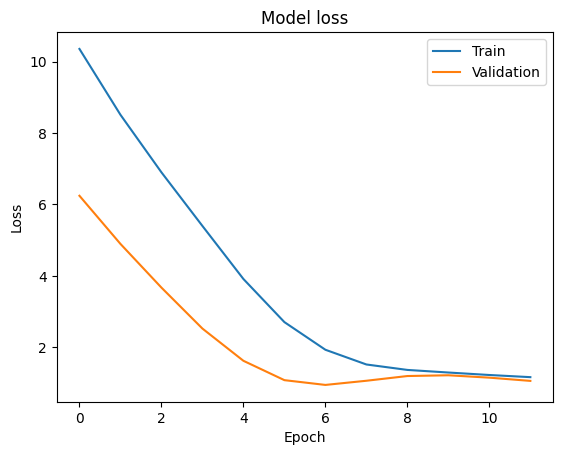

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Building the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)), # Input layer
    tf.keras.layers.Dense(32, activation='relu'), # Hidden layer
    tf.keras.layers.Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Define the callback function
early_stopping = EarlyStopping(patience=5)

# Train the model with the callback function
history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1,
                    validation_data=(X_test, y_test),
                    callbacks=[early_stopping])

# Evaluating the model (using Mean Squared Error)
loss = model.evaluate(X_test, y_test, verbose=0)
loss

# Plotting the training and testing loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()